In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Optional (best interactive charts)
# pip install plotly
import plotly.express as px

plt.style.use("seaborn-v0_8")
sns.set_theme()


In [3]:
print("Pandas version:", pd.__version__)
pd.show_versions()


Pandas version: 2.2.2

INSTALLED VERSIONS
------------------
commit                : d9cdd2ee5a58015ef6f4d15c7226110c9aab8140
python                : 3.12.12.final.0
python-bits           : 64
OS                    : Linux
OS-release            : 6.6.105+
Version               : #1 SMP Thu Oct  2 10:42:05 UTC 2025
machine               : x86_64
processor             : x86_64
byteorder             : little
LC_ALL                : en_US.UTF-8
LANG                  : en_US.UTF-8
LOCALE                : en_US.UTF-8

pandas                : 2.2.2
numpy                 : 2.0.2
pytz                  : 2025.2
dateutil              : 2.9.0.post0
setuptools            : 75.2.0
pip                   : 24.1.2
Cython                : 3.0.12
pytest                : 8.4.2
hypothesis            : None
sphinx                : 8.2.3
blosc                 : None
feather               : None
xlsxwriter            : None
lxml.etree            : 6.0.2
html5lib              : 1.1
pymysql               : None

In [4]:
data = {
    'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
    'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
    'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
    'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']
}

labels = list("abcdefghij")
df = pd.DataFrame(data, index=labels)
df


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 700.0+ bytes


,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


In [6]:
df.head(3)
df[['animal', 'age']]
df.loc[df.index[[3,4,8]], ['animal','age']]
df[df['visits'] > 2]
df[df['age'].isna()]
df[(df['animal'] == 'cat') & (df['age'] < 3)]
df[df['age'].between(2,4, inclusive="both")]


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


In [7]:
df.loc['f','age'] = 1.5
df['visits'].sum()
df.groupby('animal')['age'].mean()
df['animal'].value_counts()


,count
animal,
cat,4
dog,4
snake,2


In [8]:
df.sort_values(['age','visits'], ascending=[False, True])


,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


In [10]:
df['priority'] = df['priority'].map({'yes':True,'no':False})
df['animal'] = df['animal'].replace({'snake':'python'})
df.pivot_table(index='animal', columns='visits', values='age', aggfunc='mean')


visits,1,2,3
animal,,,
cat,2.5,NaN,2.25
dog,3.0,6.0,NaN
python,4.5,0.5,NaN


In [17]:
df2 = pd.DataFrame({'A':[1,2,2,3,4,5,5,6,7,7]})
df2[df2['A'] != df2['A'].shift()]



,A
0,1
1,2
3,3
4,4
5,5
7,6
8,7


In [18]:
df3 = pd.DataFrame(np.random.rand(5,3))
df3.sub(df3.mean(axis=1), axis=0)

,0,1,2
0,0.175504,0.055873,-0.231377
1,0.408018,-0.056096,-0.351923
2,0.228145,-0.240115,0.011970
3,0.017534,0.185849,-0.203383
4,0.004669,0.229004,-0.233673


In [20]:
df4 = pd.DataFrame(np.random.rand(5,10), columns=list("abcdefghij"))
df4.sum().idxmin()
(df.isna().cumsum(axis=1) == 3).idxmax(axis=1)


,0
a,animal
b,animal
c,animal
d,animal
e,animal
f,animal
g,animal
h,animal
i,animal
j,animal


In [21]:
df5 = pd.DataFrame({
    'grps': list('aaabbcaabcccbbc'),
    'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]
})

df5.groupby('grps')['vals'].apply(lambda x: x.nlargest(3).sum())


,vals
grps,
a,409
b,156
c,345


In [23]:
dates = pd.date_range("2015-01-01", "2015-12-31", freq="B")
s = pd.Series(np.random.rand(len(dates)), index=dates)
s[s.index.weekday == 2].sum()          # Wednesdays
s.resample("ME").mean()                # Monthly mean
s.groupby(pd.Grouper(freq="4ME")).idxmax()
pd.date_range("2015-01-01","2016-12-31",freq="WOM-3THU")


DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

In [26]:
df = pd.DataFrame({
    'From_To': ['LoNDon_paris','MAdrid_miLAN','londON_StockhOlm',
                'Budapest_PaRis','Brussels_londOn'],
    'FlightNumber':[10045,np.nan,10065,np.nan,10085],
    'RecentDelays':[[23,47],[],[24,43,87],[13],[67,32]],
    'Airline':['KLM(!)','<Air France> (12)',
               '(British Airways. )','12. Air France','"Swiss Air"']
})

# Fix flight numbers
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)

# Split From_To
temp = df['From_To'].str.split('_', expand=True)
temp.columns = ['From', 'To']
temp = temp.apply(lambda x: x.str.lower().str.capitalize())

df = df.drop(columns='From_To').join(temp)

# AIRLINE CLEANING
df['Airline'] = (
    df['Airline']
    .str.extract(r'([A-Za-z\s]+)', expand=False)
    .str.strip()
)

# Expand delays
delays = df['RecentDelays'].apply(pd.Series)
delays.columns = [f'delay_{i}' for i in range(1, delays.shape[1] + 1)]

df = df.drop(columns='RecentDelays').join(delays)

df


,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM,London,Paris,23.0,47.0,NaN
1,10055,Air France,Madrid,Milan,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0
3,10075,Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN


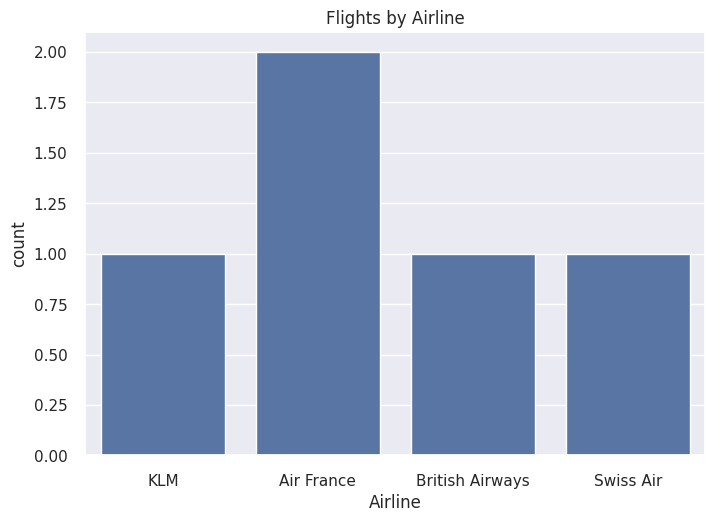

In [27]:
sns.countplot(data=df, x='Airline')
plt.title("Flights by Airline")
plt.show()


In [28]:
px.bar(df, x='Airline', y='delay_1', title="First Delay by Airline")


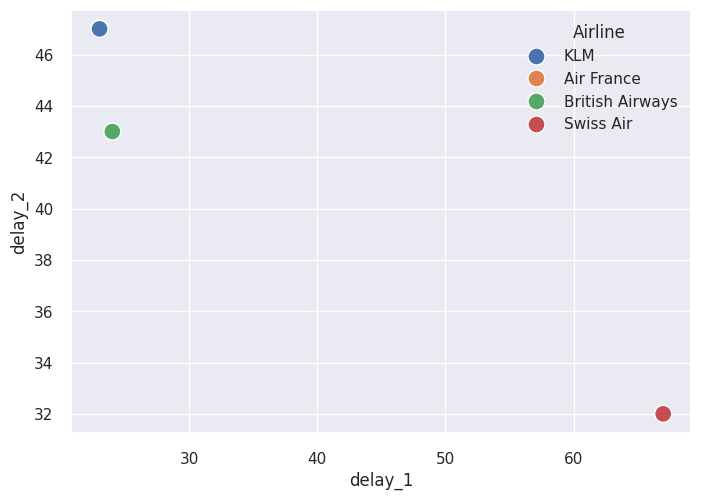

In [29]:
sns.scatterplot(data=df, x='delay_1', y='delay_2', hue='Airline', s=150)
plt.show()
